# Task 1 - Data Analysis and Preprocessing

## Import necessary libraries

In [36]:
import sys
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler


# Add the parent directory to sys.path
sys.path.append(os.path.abspath('../scripts'))

## Import functions from relevant Module

In [37]:
from preprocessing import load_datasets,display_samples,check_missing_values,clean_data,plot_purchase_value_distribution,plot_purchase_value_vs_class,convert_ip_to_integer,merge_ip_data,feature_engineering,normalize_features,one_hot_encode,display_final_data


## Load the datasets

In [38]:
creditcard_data = pd.read_csv('../data/creditcard.csv')
fraud_data = pd.read_csv('../data/Fraud_Data.csv')
ip_data = pd.read_csv('../data/IpAddress_to_Country.csv')
print(f"Data loaded successfully. Credit card Shape: {creditcard_data.shape}, Fraud data Shape: {fraud_data.shape}, IP data Shape: {ip_data.shape}")
        

Data loaded successfully. Credit card Shape: (284807, 31), Fraud data Shape: (151112, 11), IP data Shape: (138846, 3)


## Data overview

In [39]:
"""Display the first few rows of each dataset."""
display_samples(creditcard_data,fraud_data,ip_data)

# Checking for missing values
check_missing_values(creditcard_data,fraud_data,ip_data)

Credit Card Data Sample:
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

       

## 1.	Data Cleaning
### ○	Handle Missing Values, Remove duplicates and Convert relevant columns to datetime


In [40]:
creditcard_data, fraud_data, ip_data = clean_data(creditcard_data, fraud_data, ip_data)


## 2.	Exploratory Data Analysis (EDA)
### ○ Univariate analysis for fraud_data: Distribution of Purchase Value

Plotting Distribution of Purchase Value...


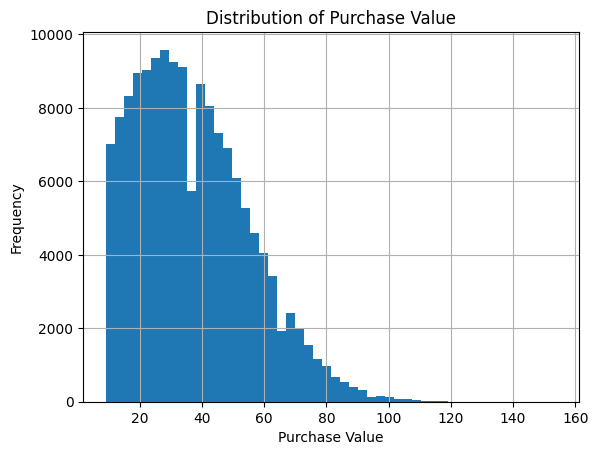

In [41]:
plot_purchase_value_distribution(fraud_data)

### ○ Bivariate analysis between purchase_value and fraud class

Plotting Purchase Value vs Fraud Class...


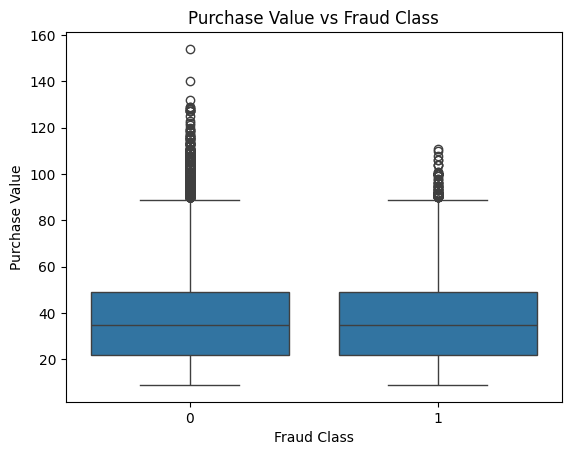

In [42]:
plot_purchase_value_vs_class(fraud_data)

## 3.	Merge Datasets for Geolocation Analysis
### ○	Convert IP addresses to integer format and Merge Fraud_Data.csv with IpAddress_to_Country.csv


In [43]:
fraud_data = convert_ip_to_integer(fraud_data)
merged_data = merge_ip_data(fraud_data, ip_data)

print("Merged Data Sample:")
print(merged_data.head(), "\n")

Merged Data Sample:
   user_id         signup_time       purchase_time  purchase_value  \
0    22058 2015-02-24 22:55:49 2015-04-18 02:47:11            34.0   
1   333320 2015-06-07 20:39:50 2015-06-08 01:38:54            16.0   
2     1359 2015-01-01 18:52:44 2015-01-01 18:52:45            15.0   
3   150084 2015-04-28 21:13:25 2015-05-04 13:54:50            44.0   
4   221365 2015-07-21 07:09:52 2015-09-09 18:40:53            39.0   

       device_id source browser sex  age       ip_address  class country  
0  QVPSPJUOCKZAR    SEO  Chrome   M   39   73275836879972      0     NaN  
1  EOGFQPIZPYXFZ    Ads  Chrome   F   53  350311387865908      0     NaN  
2  YSSKYOSJHPPLJ    SEO   Opera   M   53  262147382011095      1     NaN  
3  ATGTXKYKUDUQN    SEO  Safari   M   41  384054244391396      0     NaN  
4  NAUITBZFJKHWW    Ads  Safari   M   45  415583117452712      0     NaN   



## 4.	Feature Engineering


### ○	Transaction frequency and velocity for Fraud_Data.csv
### ○	Time-Based features for Fraud_Data.csv
####      i.	hour_of _day
####      ii.	day_of_week

In [44]:
fraud_data = feature_engineering(fraud_data)

## 5.	Normalization and Scaling

In [45]:
fraud_data = normalize_features(fraud_data)

## 6.	Encode Categorical Features

In [46]:
fraud_data = one_hot_encode(fraud_data)

display_final_data(fraud_data)

Fraud Data with New Features:
   user_id         signup_time       purchase_time  purchase_value  \
0    22058 2015-02-24 22:55:49 2015-04-18 02:47:11        0.172414   
1   333320 2015-06-07 20:39:50 2015-06-08 01:38:54        0.048276   
2     1359 2015-01-01 18:52:44 2015-01-01 18:52:45        0.041379   
3   150084 2015-04-28 21:13:25 2015-05-04 13:54:50        0.241379   
4   221365 2015-07-21 07:09:52 2015-09-09 18:40:53        0.206897   

       device_id  age       ip_address  class  transaction_frequency  \
0  QVPSPJUOCKZAR   39   73275836879972      0                      1   
1  EOGFQPIZPYXFZ   53  350311387865908      0                      1   
2  YSSKYOSJHPPLJ   53  262147382011095      1                      1   
3  ATGTXKYKUDUQN   41  384054244391396      0                      1   
4  NAUITBZFJKHWW   45  415583117452712      0                      1   

   transaction_velocity  hour_of_day  day_of_week  source_Direct  source_SEO  \
0              0.434673            2

## 7. Save preprocessed datasets

In [47]:
fraud_data.to_csv('../data/Preprocessed_Fraud_Data.csv', index=False)
creditcard_data.to_csv('../data/Preprocessed_creditcard.csv', index=False)